What follows is recorded weather data for Sault Ste. Marie, Michigan for January 1, 1948 through December 30, 2022. 
Original data can be found [here](https://www.ncei.noaa.gov/access/past-weather/49783) . 

I'll be converting the Date column, adding a Month column, completing some summary statistics, sorting out just Christmas Day and saving it to a new CSV file. 

In [78]:
# Import the necessary modules
import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [39]:
soo = pd.read_csv(r"..\DATA\Sault-Weather.csv")

In [40]:
soo.head()

,Date,AvgTemp,MaxTemp,MinTemp,Precip,SnowFall,SnowDepth
0,1/1/1948,NaN,19.0,2.0,0.00,0.0,12.0
1,1/2/1948,NaN,33.0,11.0,0.00,0.0,11.0
2,1/3/1948,NaN,27.0,9.0,0.00,0.0,10.0
3,1/4/1948,NaN,31.0,22.0,0.17,3.4,14.0
4,1/5/1948,NaN,30.0,23.0,0.01,0.3,13.0


In [41]:
soo.tail()

,Date,AvgTemp,MaxTemp,MinTemp,Precip,SnowFall,SnowDepth
27388,12/26/2022,21.0,24.0,17.0,0.25,4.0,36.0
27389,12/27/2022,20.0,25.0,17.0,0.18,3.9,39.0
27390,12/28/2022,28.0,35.0,24.0,0.14,2.3,39.0
27391,12/29/2022,37.0,43.0,35.0,0.01,0.0,32.0
27392,12/30/2022,42.0,48.0,34.0,0.04,0.0,24.0


In [42]:
soo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27393 entries, 0 to 27392
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       27393 non-null  object 
 1   AvgTemp    6162 non-null   float64
 2   MaxTemp    27370 non-null  float64
 3   MinTemp    27189 non-null  float64
 4   Precip     27391 non-null  float64
 5   SnowFall   26733 non-null  float64
 6   SnowDepth  26730 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.5+ MB


In [43]:
soo.describe(include = 'all')

,Date,AvgTemp,MaxTemp,MinTemp,Precip,SnowFall,SnowDepth
count,27393,6162.000000,27370.000000,27189.000000,27391.000000,26733.000000,26730.000000
unique,27393,NaN,NaN,NaN,NaN,NaN,NaN
top,1/1/1948,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,43.556800,50.043515,32.016808,0.092756,0.326959,5.194347
std,NaN,19.433674,21.231504,19.039285,0.220312,1.029183,8.571043
min,NaN,-15.000000,-12.000000,-36.000000,0.000000,0.000000,0.000000
25%,NaN,29.000000,33.000000,20.000000,0.000000,0.000000,0.000000
50%,NaN,44.000000,50.000000,34.000000,0.000000,0.000000,0.000000
75%,NaN,60.000000,69.000000,47.000000,0.080000,0.000000,9.000000


In [44]:
#Converting Date to date type format
soo['Date'] = pd.to_datetime(soo['Date'], format='%m/%d/%Y')

# adding columns with month/day/year

soo['Month'] = pd.to_datetime(soo['Date']).dt.month
soo['Day'] = pd.to_datetime(soo['Date']).dt.day
soo['Year'] = pd.to_datetime(soo['Date']).dt.year


In [45]:
soo.head()

,Date,AvgTemp,MaxTemp,MinTemp,Precip,SnowFall,SnowDepth,Month,Day,Year
0,1948-01-01,NaN,19.0,2.0,0.00,0.0,12.0,1,1,1948
1,1948-01-02,NaN,33.0,11.0,0.00,0.0,11.0,1,2,1948
2,1948-01-03,NaN,27.0,9.0,0.00,0.0,10.0,1,3,1948
3,1948-01-04,NaN,31.0,22.0,0.17,3.4,14.0,1,4,1948
4,1948-01-05,NaN,30.0,23.0,0.01,0.3,13.0,1,5,1948


In [46]:
# adding a new column with month name
data = {'Month': [1,2,3,4,5,6,7,8,9,10,11,12],\
        'month_name': ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]}
month_name = pd.DataFrame(data)
soo = soo.merge(month_name,on = 'Month',how = 'left')

In [47]:
soo.head()

,Date,AvgTemp,MaxTemp,MinTemp,Precip,SnowFall,SnowDepth,Month,Day,Year,month_name
0,1948-01-01,NaN,19.0,2.0,0.00,0.0,12.0,1,1,1948,January
1,1948-01-02,NaN,33.0,11.0,0.00,0.0,11.0,1,2,1948,January
2,1948-01-03,NaN,27.0,9.0,0.00,0.0,10.0,1,3,1948,January
3,1948-01-04,NaN,31.0,22.0,0.17,3.4,14.0,1,4,1948,January
4,1948-01-05,NaN,30.0,23.0,0.01,0.3,13.0,1,5,1948,January


In [48]:
soo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27393 entries, 0 to 27392
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        27393 non-null  datetime64[ns]
 1   AvgTemp     6162 non-null   float64       
 2   MaxTemp     27370 non-null  float64       
 3   MinTemp     27189 non-null  float64       
 4   Precip      27391 non-null  float64       
 5   SnowFall    26733 non-null  float64       
 6   SnowDepth   26730 non-null  float64       
 7   Month       27393 non-null  int64         
 8   Day         27393 non-null  int64         
 9   Year        27393 non-null  int64         
 10  month_name  27393 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(3), object(1)
memory usage: 2.5+ MB


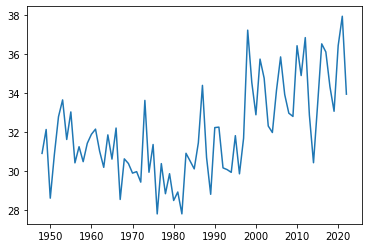

In [49]:
# visualizing some of the relationships
#average daily low temperatures have increased over the years

soo.groupby('Year').mean()
plt.plot(soo.groupby('Year').mean().MinTemp.index, soo.groupby('Year').mean().MinTemp.values)
plt.savefig("../Media/mintemps.png")
         
plt.show()

In [50]:
# Top 10 hottest average years overall 
round(soo[['Year', 'MaxTemp']].groupby('Year').mean().sort_values(by=['MaxTemp'], ascending = False).head(10),2)

,MaxTemp
Year,
2021,54.77
2012,54.44
1998,54.03
2010,53.58
2016,53.51
1987,53.03
2020,52.66
2006,52.34
2001,52.33


In [51]:
#Top 20 Hottest temperatures

soo[['Date', 'month_name', 'Year', 'MaxTemp']].sort_values(['MaxTemp'], ascending = False).head(20)

,Date,month_name,Year,MaxTemp
10073,1975-07-31,July,1975,97.0
14799,1988-07-08,July,1988,97.0
14798,1988-07-07,July,1988,97.0
10074,1975-08-01,August,1975,96.0
14797,1988-07-06,July,1988,96.0
24680,2015-07-28,July,2015,95.0
10478,1976-09-08,September,1976,95.0
14820,1988-07-29,July,1988,95.0
21762,2007-08-01,August,2007,94.0
21011,2005-07-11,July,2005,94.0


In [88]:
#Top 10 Lowest temperatures

soo[['Date', 'MinTemp']].sort_values(['MinTemp'], ascending = True).head(10).style.hide(axis='index')  #using .style.hide takes the index out of the viewed output, but however, it does add 00:00:00 to each row of the Date column. 


Date,MinTemp
1982-01-10 00:00:00,-36.000000
1979-02-17 00:00:00,-35.000000
1984-01-21 00:00:00,-33.000000
1981-01-04 00:00:00,-32.000000
1993-12-26 00:00:00,-31.000000
1977-01-09 00:00:00,-30.000000
1994-01-15 00:00:00,-29.000000
1981-01-11 00:00:00,-29.000000
1948-03-11 00:00:00,-28.000000
1971-02-02 00:00:00,-28.000000


In [87]:
result = soo[['Date', 'MinTemp']].sort_values(['MinTemp'], ascending = True).head(10)
display(result.style.format({'MinTemp': '{:.2f}'}).hide(axis='index'))
# This will apply the formatting string '{:.2f}' to the MinTemp column, which will round the floats to 2 decimal places and display them as strings, hide the index and display as a data frame. 

Date,MinTemp
1982-01-10 00:00:00,-36.00
1979-02-17 00:00:00,-35.00
1984-01-21 00:00:00,-33.00
1981-01-04 00:00:00,-32.00
1993-12-26 00:00:00,-31.00
1977-01-09 00:00:00,-30.00
1994-01-15 00:00:00,-29.00
1981-01-11 00:00:00,-29.00
1948-03-11 00:00:00,-28.00
1971-02-02 00:00:00,-28.00


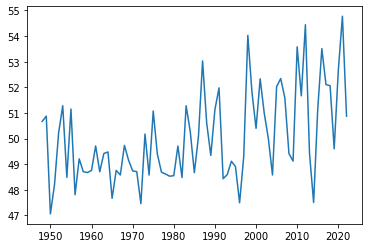

In [53]:
#Daily average high temperatures(F) have steadily increased by some four degrees on average over the past seventy years, with periodic cold years.
soo.groupby('Year').mean()
plt.plot(soo.groupby('Year').mean().MaxTemp.index, soo.groupby('Year').mean().MaxTemp.values)
plt.savefig("../Media/maxtemps.png")

         

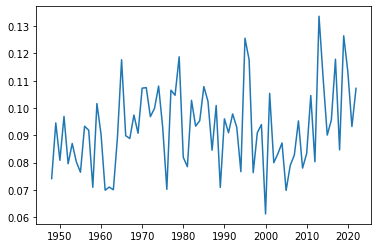

In [54]:
#Average rainfall per year is slightly up, about .04 inch on average, though it has been dryer the past couple years. 

soo.groupby('Year').mean()
plt.plot(soo.groupby('Year').mean().Precip.index, soo.groupby('Year').mean().Precip.values)
         

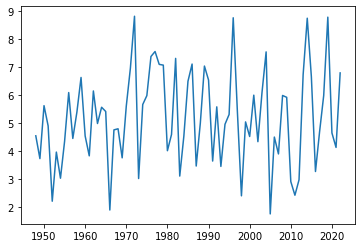

In [55]:

#Average Snow Depth inches per year have continued to be cyclic. 

soo.groupby('Year').mean()
plt.plot(soo.groupby('Year').mean().SnowDepth.index, soo.groupby('Year').mean().SnowDepth.values)
plt.savefig("../Media/snowDepths.png")

         

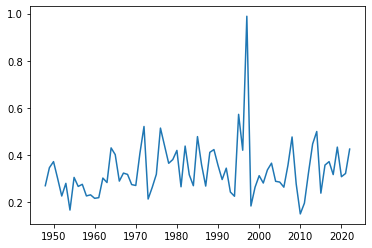

In [57]:
#Average snowfall per year - there was a major snow event in 1995, as seen here. 

soo.groupby('Year').mean()
plt.plot(soo.groupby('Year').mean().SnowFall.index, soo.groupby('Year').mean().SnowFall.values)
plt.savefig("../Media/snowfalls.png")

         

In [58]:
soo.corr()

,AvgTemp,MaxTemp,MinTemp,Precip,SnowFall,SnowDepth,Month,Day,Year
AvgTemp,1.000000,0.982175,0.980509,0.083414,-0.362353,-0.715363,0.294578,0.008636,-0.017004
MaxTemp,0.982175,1.000000,0.926515,0.038405,-0.350038,-0.687789,0.260219,0.015364,0.041299
MinTemp,0.980509,0.926515,1.000000,0.132806,-0.318577,-0.714962,0.334885,0.020073,0.070100
Precip,0.083414,0.038405,0.132806,1.000000,0.243499,-0.058184,0.071826,0.010341,0.016187
SnowFall,-0.362353,-0.350038,-0.318577,0.243499,1.000000,0.318985,-0.061852,-0.009130,0.016610
SnowDepth,-0.715363,-0.687789,-0.714962,-0.058184,0.318985,1.000000,-0.521263,-0.017150,0.023544
Month,0.294578,0.260219,0.334885,0.071826,-0.061852,-0.521263,1.000000,0.010405,-0.000057
Day,0.008636,0.015364,0.020073,0.010341,-0.009130,-0.017150,0.010405,1.000000,-0.000157
Year,-0.017004,0.041299,0.070100,0.016187,0.016610,0.023544,-0.000057,-0.000157,1.000000


<AxesSubplot:>

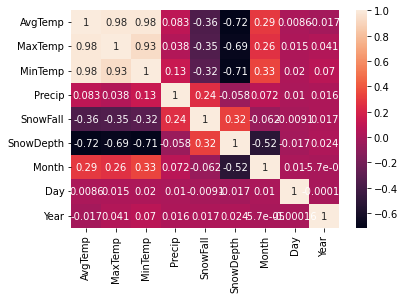

In [59]:
# Plot a correlation matrix
sns.heatmap(soo.corr(), annot=True)

One would expect a strong negative correlation to higher temperatures and snow depth while holding a strong correlation to low temperatures. 

In [60]:
soo.to_csv(r'C:\Users\Marcy\Documents\GitHub\Will There Be a White Christmas this Year in Sault, Michigan\DATA\SooCleaned.csv')

## Sault Seal Sledding Hill (aka Minneapolis Hill) 

Assuming staffers need a base of 12 inches of snow in order to operate the lift and ensure a fast tube ride down the hill, which day, on average, can they expect to have that amount of snow most years? 

In [61]:
# define function that returns the first occurrence of snow depth > 12 for a given year.
def first_occurrence(group):
    return group[group["SnowDepth"] >= 12].iloc[0]

# group the data by year and apply the custom function to each group
SaultSled = soo.groupby("Year").apply(first_occurrence)

In [62]:
#save this off to CSV for possible use in Tableau

SaultSled.to_csv("../DATA/SaultSled.csv")

In [63]:
# alternative method to filter Snow Depth to 12 inches or more:
soo.query("SnowDepth >= 12").count()

Date          5696
AvgTemp       1249
MaxTemp       5679
MinTemp       5548
Precip        5696
SnowFall      5696
SnowDepth     5696
Month         5696
Day           5696
Year          5696
month_name    5696
dtype: int64

In [89]:
result = soo.query("SnowDepth >= 12").groupby('Date').size()
print(result)


Date
1948-01-01    1
1948-01-04    1
1948-01-05    1
1948-01-06    1
1948-01-07    1
             ..
2022-12-26    1
2022-12-27    1
2022-12-28    1
2022-12-29    1
2022-12-30    1
Length: 5696, dtype: int64


Bin days into weeks, and extract the week numbers from the dates in the Date column, add a new Week column to the DataFrame, and group by the week numbers, ranked in descending order, with the weeks that have the most occurrences at the top.

When grouped this way, weeks 4, 5, 6,7, 8 and 9 have more occurrences of having snow 12 inches or deeper. There's a slight lead in weeks 6 and 7, which correspond to halfway through February. 

This allows for maintenance, hiring and opening procedures to be better forecasted each year. 


In [92]:
result = soo.query("SnowDepth >= 12")
result['Week'] = result['Date'].dt.strftime('%U')
result = result.groupby('Week').size().sort_values(ascending=False)
print(result)


Week
07    462
06    460
08    447
05    445
04    432
09    430
10    402
03    384
02    337
11    333
01    299
12    277
13    177
52    170
51    157
00    122
50     98
14     89
49     76
15     33
48     29
47     12
53     10
46      8
16      5
45      2
dtype: int64


C:\Users\Marcy\AppData\Local\Temp\ipykernel_13244\754709007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Week'] = result['Date'].dt.strftime('%U')


In [91]:
result = soo.query("SnowDepth >= 12").groupby('Date').size().resample('7D').sum()
result = result.sort_values(ascending=False)
print(result)


Date
1991-02-21    7
1986-01-09    7
1985-12-26    7
1985-12-19    7
1985-12-12    7
             ..
1984-09-06    0
1984-09-13    0
1984-09-20    0
1984-09-27    0
1985-07-04    0
Length: 3914, dtype: int64


<AxesSubplot:xlabel='Year', ylabel='SnowDepth'>

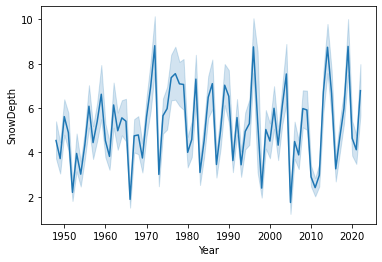

In [67]:
## Graph it 

# create a line plot of the results using Seaborn
sns.lineplot(x="Year", y="SnowDepth", data=soo)

In [69]:
soo.describe(percentiles = np.arange(0,1,0.05))

,AvgTemp,MaxTemp,MinTemp,Precip,SnowFall,SnowDepth,Month,Day,Year
count,6162.000000,27370.000000,27189.000000,27391.000000,26733.000000,26730.000000,27393.000000,27393.000000,27393.000000
mean,43.556800,50.043515,32.016808,0.092756,0.326959,5.194347,6.522688,15.729201,1984.997956
std,19.433674,21.231504,19.039285,0.220312,1.029183,8.571043,3.448682,8.799981,21.648544
min,-15.000000,-12.000000,-36.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1948.000000
0%,-15.000000,-12.000000,-36.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1948.000000
5%,10.000000,16.000000,-3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1951.000000
10%,17.000000,22.000000,5.000000,0.000000,0.000000,0.000000,2.000000,4.000000,1955.000000
15%,22.000000,26.000000,10.000000,0.000000,0.000000,0.000000,2.000000,5.000000,1959.000000
20%,26.000000,30.000000,15.000000,0.000000,0.000000,0.000000,3.000000,7.000000,1962.400000
25%,29.000000,33.000000,20.000000,0.000000,0.000000,0.000000,4.000000,8.000000,1966.000000


It can helpful to understand outliers by breaking out data into percentiles. The 75th percentile, or three quarters of the data is still 9 inches of snow or less.  So it's not but a quarter of the time that there's enough snow to operate, assuming 12 inches is the base amount. 

In [ ]:
# file.tell()

In [72]:
soo.describe(include = ['O'])

,month_name
count,27393
unique,12
top,January
freq,2325


In [73]:
soo.Year.unique()

array([1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [74]:
# check if number of rows corresponds to number of unique values of Year variable

len(soo), soo.Date.nunique()

(27393, 27393)

The number of rows is the same as number of unique dates, so we know we don't have duplicates that can adversely weight our calculations 

In [79]:
# frequencies and percentages of unique values for the Date column
soo['Date'].value_counts(normalize = True)* 100

# this returns percentages of the total rather than just frequencies.

1948-01-01    0.003651
1998-01-09    0.003651
1998-01-07    0.003651
1998-01-06    0.003651
1998-01-05    0.003651
                ...   
1972-12-28    0.003651
1972-12-27    0.003651
1972-12-26    0.003651
1972-12-25    0.003651
2022-12-30    0.003651
Name: Date, Length: 27393, dtype: float64

# creating new features 
feature engineering is important in extracting information from a dataset



# sort dataset based on value of a feature 

In [76]:
weather_sorted_maxtemp  = soo.loc[(soo.MaxTemp.isin([90]))]

In [77]:
weather_sorted_maxtemp

,Date,AvgTemp,MaxTemp,MinTemp,Precip,SnowFall,SnowDepth,Month,Day,Year,month_name
191,1948-07-10,NaN,90.0,59.0,0.00,0.0,0.0,7,10,1948,July
236,1948-08-24,NaN,90.0,69.0,0.01,0.0,0.0,8,24,1948,August
237,1948-08-25,NaN,90.0,64.0,0.00,0.0,0.0,8,25,1948,August
528,1949-06-12,NaN,90.0,60.0,0.00,0.0,0.0,6,12,1949,June
585,1949-08-08,NaN,90.0,62.0,0.00,0.0,0.0,8,8,1949,August
2064,1953-08-26,NaN,90.0,59.0,0.00,0.0,0.0,8,26,1953,August
2751,1955-07-14,NaN,90.0,58.0,0.00,0.0,0.0,7,14,1955,July
2768,1955-07-31,NaN,90.0,67.0,0.00,0.0,0.0,7,31,1955,July
3086,1956-06-13,NaN,90.0,60.0,0.00,0.0,0.0,6,13,1956,June
6766,1966-07-11,NaN,90.0,61.0,0.00,0.0,0.0,7,11,1966,July
